In [2]:
!pip install opencv-python
!pip install tensorflow
!pip install --upgrade pip
!pip install scikit-learn seaborn matplotlib pandas numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pip-26.0.1-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-26.0.1-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\Admin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


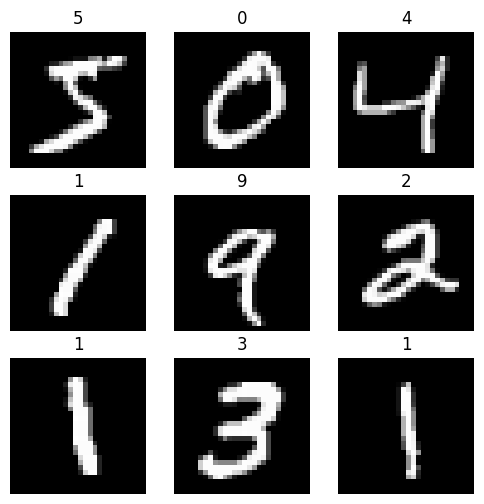

In [4]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [6]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

In [7]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_train)

y_pred_lr = lr_model.predict(X_test_flat)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9259


In [8]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = cnn_model.fit(
    X_train_cnn, y_train_cat,
    epochs=5,
    validation_split=0.2
)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9503 - loss: 0.1606 - val_accuracy: 0.9802 - val_loss: 0.0650
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9833 - loss: 0.0539 - val_accuracy: 0.9859 - val_loss: 0.0448
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9887 - loss: 0.0356 - val_accuracy: 0.9868 - val_loss: 0.0446
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9913 - loss: 0.0277 - val_accuracy: 0.9785 - val_loss: 0.0689
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9930 - loss: 0.0202 - val_accuracy: 0.9896 - val_loss: 0.0383


In [9]:
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test_cat)
print("CNN Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9901 - loss: 0.0291
CNN Test Accuracy: 0.9901000261306763


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


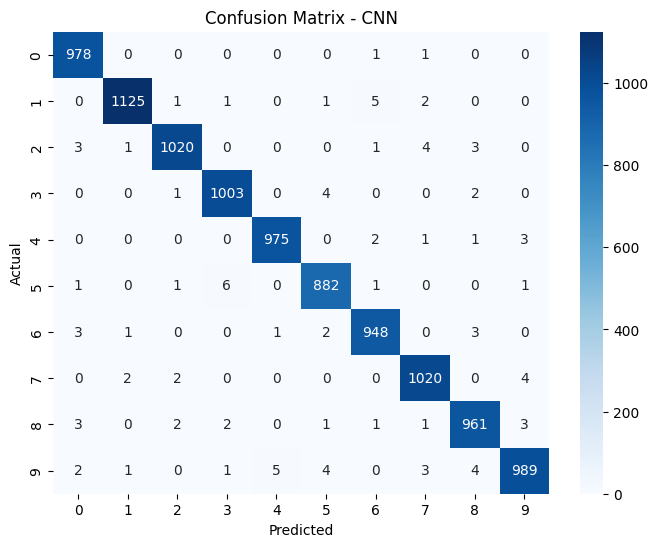

In [10]:
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

cm = confusion_matrix(y_test, y_pred_cnn_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN")
plt.show()

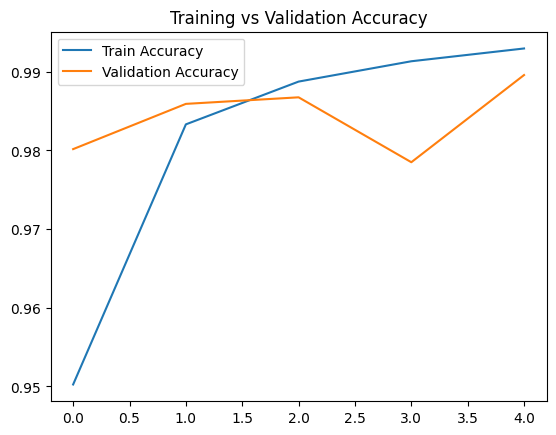

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()